# <a id='toc1_'></a>[주성분분석(Principal Component Analysis)](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [주성분분석(Principal Component Analysis)](#toc1_)    
- [random number 행렬에 PCA 적용](#toc2_)    
  - [주성분 2개](#toc2_1_)    
  - [주성분 1개](#toc2_2_)    
- [Iris 데이터에 PCA 적용](#toc3_)    
  - [Standard Scaler](#toc3_1_)    
  - [pca 결과를 pandas로 정리](#toc3_2_)    
  - [4개 특성 모두 RandomForest 학습](#toc3_3_)    
  - [2개 특성만 RandomForest 학습](#toc3_4_)    
- [와인 데이터에 PCA 적용](#toc4_)    
  - [Standard Scaler](#toc4_1_)    
  - [주성분 2개 PCA](#toc4_2_)    
    - [RandomForest 학습](#toc4_2_1_)    
  - [주성분 3개 PCA](#toc4_3_)    
    - [시각화](#toc4_3_1_)    
- [Eigenface](#toc5_)    
  - [주성분 2개 PCA](#toc5_1_)    
    - [시각화(원점 mean, 주성분 두개)](#toc5_1_1_)    
    - [가중치에 따른 주성분 벡터 변화](#toc5_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

- 차원축소(dimensionality reduction), 변수 추출(feature extraction) 기법으로 널리 쓰임
- 데이터의 분산(variance)를 최대한 보존하면서  서로 직교하는 새 기저(축)을 찾아, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법
- 변수 추출(feature extraction)은 기존 변수를 조합해 새로운 변수를 만드는 기법

# <a id='toc2_'></a>[random number 행렬에 PCA 적용](#toc0_)

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')


In [9]:
from sklearn.decomposition import PCA

In [2]:
rng = np.random.RandomState(13)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X.shape

(200, 2)

In [4]:
X

array([[-1.07103225e-01, -3.31411265e-01],
       [ 3.61221011e-01,  4.12447007e-01],
       [ 7.92641186e-01,  7.83199551e-02],
       [ 1.22190326e+00,  3.72340981e+00],
       [ 1.17483182e+00,  1.62026754e+00],
       [ 3.66455040e-01, -5.23265709e-01],
       [ 8.14057485e-01, -1.46869632e-01],
       [-7.82888709e-01, -7.39292503e-01],
       [-7.05016180e-01, -1.02201438e+00],
       [-1.34957018e+00, -2.53775010e+00],
       [ 2.89674499e-02, -1.19791431e+00],
       [-1.84963913e-01, -1.83202370e-01],
       [ 6.00056811e-01,  3.03677108e-01],
       [ 3.41934464e-01,  6.48346265e-01],
       [ 7.11548542e-02, -8.29059119e-03],
       [ 1.93385201e+00,  2.83564626e+00],
       [ 3.67276222e-02, -1.26791221e+00],
       [ 1.22164133e-01,  5.59251496e-01],
       [-9.58632015e-01, -1.59689218e+00],
       [ 7.03686415e-01,  7.75747902e-02],
       [ 9.69778312e-01,  1.71544460e+00],
       [-1.30345417e+00, -2.75798682e+00],
       [-1.33857699e-01, -2.04773486e-01],
       [ 9.

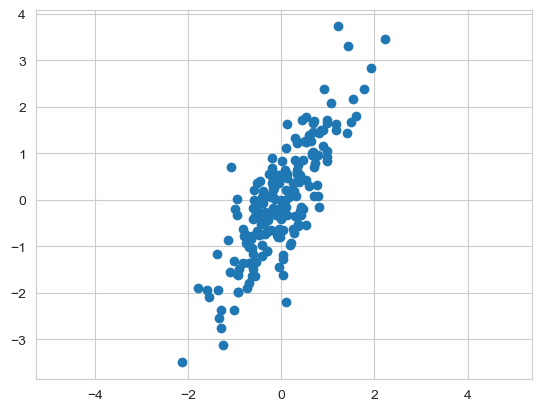

In [ ]:
plt.scatter(X[:,0], X[:, 1])
plt.axis('equal') # 가로세로축의 비율을 똑같게
plt.show()

## <a id='toc2_1_'></a>[주성분 2개](#toc0_)

In [10]:
pca = PCA(n_components=2, random_state=13) # 주성분을 두개만 찾으라는 파라미터(두개의 벡터)
pca.fit(X)

PCA(n_components=2, random_state=13)

In [11]:
pca.components_ # 벡터 두개

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [12]:
pca.explained_variance_

array([1.82531406, 0.13209947])

In [13]:
pca.mean_

array([-0.03360413, -0.03527382])

In [16]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, color='black', shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-2.346839332894307, 2.4400046646752487, -3.859118166687874, 4.08448257499405)

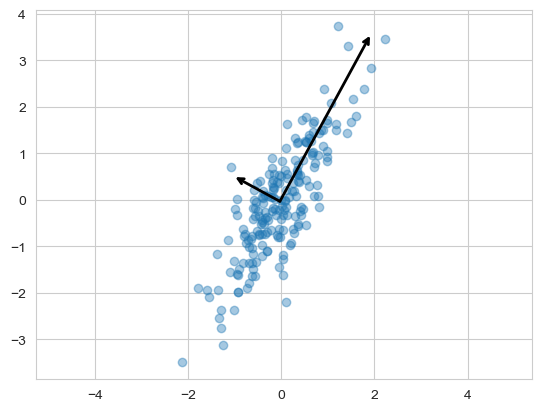

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal')

## <a id='toc2_2_'></a>[주성분 1개](#toc0_)

In [22]:
pca = PCA(n_components=1, random_state=13)
pca.fit(X)
X_pca = pca.transform(X)

pca.components_, pca.explained_variance_

(array([[0.47802511, 0.87834617]]), array([1.82531406]))

(-2.346839332894307, 2.4400046646752487, -3.952183143618388, 4.08891424056217)

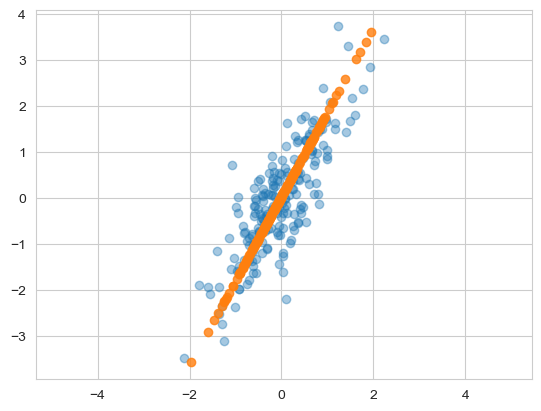

In [ ]:
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:,0], X[:, 1], alpha=0.4)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

# <a id='toc3_'></a>[Iris 데이터에 PCA 적용](#toc0_)

In [24]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target
iris_pd.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   species  
0        0  
1        0  
2        0

/usr/local/anaconda3/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


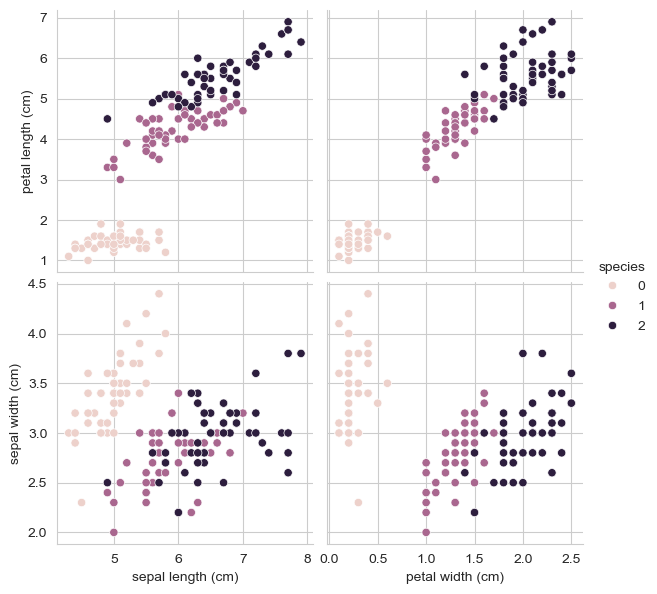

In [25]:
sns.pairplot(iris_pd, hue='species', height=3, 
            x_vars=['sepal length (cm)', 'petal width (cm)'],
            y_vars=['petal length (cm)', 'sepal width (cm)']
            );

- 특성 4개를 한 번에 확인하기에는 어려움

## <a id='toc3_1_'></a>[Standard Scaler](#toc0_)

In [26]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [27]:
# pca 결과를 반환하는 함수
def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

- 원래의 iris 데이터의 shape은 (150, 4)로 특성이 4개인데, pca를 적용하니 두개의 feature 를 가지도록 바뀜

In [28]:
iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape

(150, 2)

In [29]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [ ]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

## <a id='toc3_2_'></a>[pca 결과를 pandas로 정리](#toc0_)

In [33]:
def get_pd_from_pca(pca_data, cols=['pca_component_1', 'pca_component_2']):
    return pd.DataFrame(pca_data, columns=cols)

In [35]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head(3)

pca_component_1  pca_component_2  species
0        -2.264703         0.480027        0
1        -2.080961        -0.674134        0
2        -2.364229        -0.341908        0

/usr/local/anaconda3/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


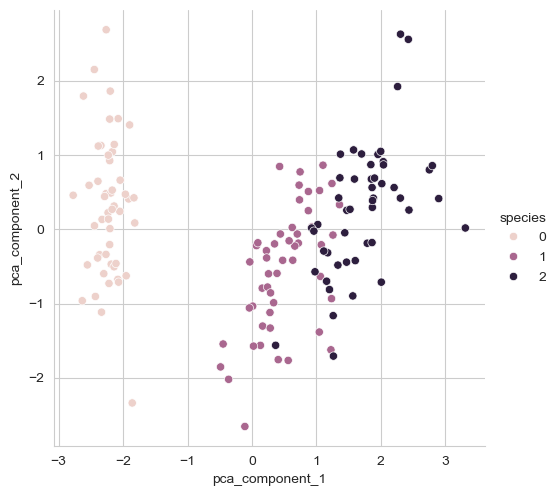

In [36]:
sns.pairplot(
    iris_pd_pca, 
    hue='species',
    height=5, 
    x_vars=['pca_component_1'],
    y_vars=['pca_component_2']
)

In [38]:
def print_variance_ratio(pca):
    print('variance ratio: ', pca.explained_variance_ratio_)
    print('sum of variance_ratio: ', np.sum(pca.explained_variance_ratio_))

- 두 개의 축으로 줄였을 때 전체의 95.8%정도를 표현할 수 있다고 함

In [ ]:
print_variance_ratio(pca)

variance ratio:  [0.72962445 0.22850762]
sum of variance_ratio:  0.9581320720000165


## <a id='toc3_3_'></a>[4개 특성 모두 RandomForest 학습](#toc0_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)

    print('Score: ', np.mean(scores_rf))

rf_scores(iris_ss, iris.target)

Score:  0.96


## <a id='toc3_4_'></a>[2개 특성만 RandomForest 학습](#toc0_)

In [ ]:
pca_X = iris_pd_pca[['pca_component_1', 'pca_component_2']]

rf_scores(pca_X, iris.target)

Score:  0.9066666666666666


# <a id='toc4_'></a>[와인 데이터에 PCA 적용](#toc0_)

In [44]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/wine.csv'

wine=pd.read_csv(wine_url, index_col=0)
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color  
0      9.4        5      1  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      1

In [ ]:
wine_y = wine['color']
wine_X = wine.drop(['color'], axis=1)
wine_X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## <a id='toc4_1_'></a>[Standard Scaler](#toc0_)

In [ ]:
wine_ss = StandardScaler().fit_transform(wine_X)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

## <a id='toc4_2_'></a>[주성분 2개 PCA](#toc0_)

In [47]:
wine_ss.shape

(6497, 12)

In [48]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
pca_wine.shape

(6497, 2)

- 와인의 컬럼들이 많은데 2개의 주성분으로 줄이는 건 데이터의 50%밖에 표현을 못함

In [49]:
print_variance_ratio(pca)

variance ratio:  [0.25346226 0.22082117]
sum of variance_ratio:  0.474283427432362


/usr/local/anaconda3/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


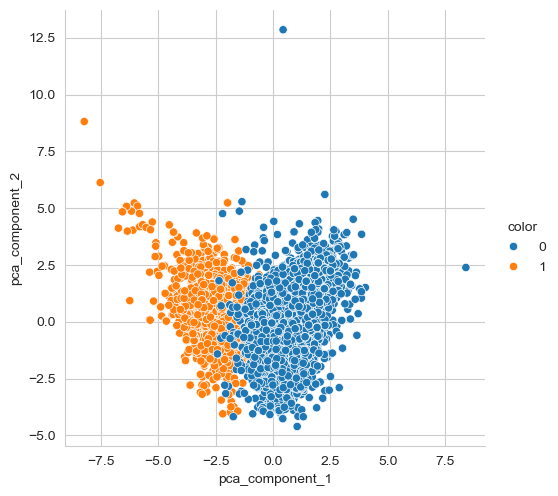

In [ ]:
pca_columns=['pca_component_1', 'pca_component_2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
pca_wine_pd['color'] = wine_y.values

sns.pairplot(
    pca_wine_pd, 
    hue='color',
    height=5, 
    x_vars=pca_columns[0],
    y_vars=pca_columns[1]
)

### <a id='toc4_2_1_'></a>[RandomForest 학습](#toc0_)

In [51]:
rf_scores(wine_ss, wine_y)

Score:  0.9935352638124


In [ ]:
pca_X = pca_wine_pd[pca_columns]
rf_scores(pca_X, wine_y)

Score:  0.981067803635933


## <a id='toc4_3_'></a>[주성분 3개 PCA](#toc0_)

In [53]:
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_variance_ratio(pca)

cols=['pca_1', 'pca_2', 'pca_3']
pca_wine_pd = get_pd_from_pca(pca_wine, cols=cols)

pca_X = pca_wine_pd[cols]
rf_scores(pca_X, wine_y)

variance ratio:  [0.25346226 0.22082117 0.13679223]
sum of variance_ratio:  0.6110756621838703
Score:  0.9832236631728548


In [ ]:
pca_wine_plot = pca_X
pca_wine_plot['color'] = wine_y.values
pca_wine_plot.head()

pca_1     pca_2     pca_3  color
0 -3.348438  0.568926 -2.727386      1
1 -3.228595  1.197335 -1.998904      1
2 -3.237468  0.952580 -1.746578      1
3 -1.672561  1.600583  2.856552      1
4 -3.348438  0.568926 -2.727386      1

### <a id='toc4_3_1_'></a>[시각화](#toc0_)

In [55]:
from mpl_toolkits.mplot3d import Axes3D

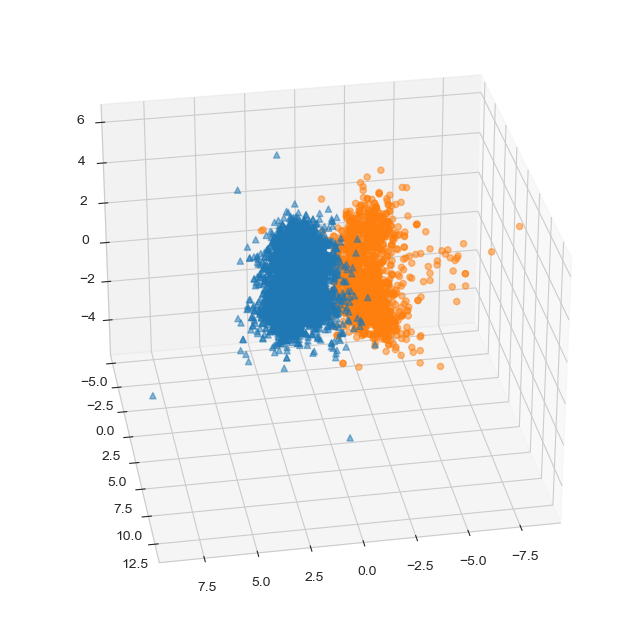

In [56]:
markers = ['^', 'o']

fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111, projection='3d')

for i, marker in enumerate(markers):
    x_axis_data=pca_wine_plot[pca_wine_plot['color']== i]['pca_1']
    y_axis_data=pca_wine_plot[pca_wine_plot['color']== i]['pca_2']
    z_axis_data=pca_wine_plot[pca_wine_plot['color']== i]['pca_3']
    
    ax.scatter(x_axis_data, y_axis_data, z_axis_data, s=20, alpha=0.5, marker=marker)
    
ax.view_init(30, 80)
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    pca_wine_plot,
    x='pca_1',
    y='pca_2',
    z='pca_3',
    color='color',
    symbol='color',
    opacity=0.4
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# <a id='toc5_'></a>[Eigenface](#toc0_)

[Kaggle의 olivetti](https://www.kaggle.com/datasets/imrandude/olivetti)

- sklearn에서 제공하기도 함

In [102]:
import matplotlib.pyplot as plt
import numpy as np

In [72]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
print(faces_all.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [76]:
print(f'There are {str(len(faces_all.data))} images in the dataset')
print(f'There are {str(len(np.unique(faces_all.target)))} unique targets in the dataset')

There are 400 images in the dataset
There are 40 unique targets in the dataset


In [77]:
print(f'Unique target number: {str(np.unique(faces_all.target))}')

Unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


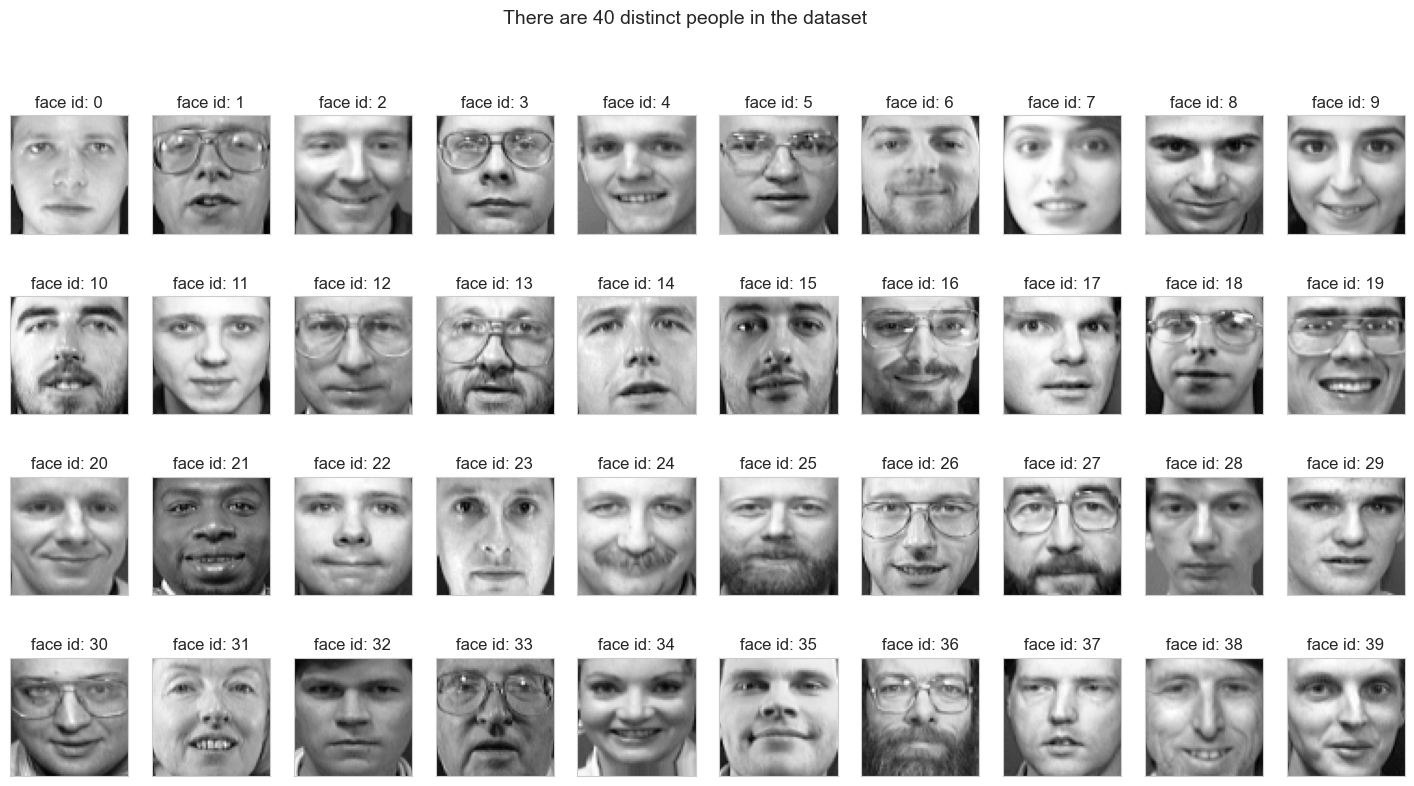

In [87]:
def show_40_distinct_people(images, unique_ids):
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr = axarr.flatten()
    
    for unique_id in unique_ids:
        image_index = unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].grid(False)
        axarr[unique_id].xaxis.set_ticks([]) # x 축 제거
        axarr[unique_id].yaxis.set_ticks([]) # y 축 제거
        axarr[unique_id].set_title(f'face id: {unique_id}')
    
    plt.suptitle('There are 40 distinct people in the dataset', fontsize=14)

show_40_distinct_people(faces_all.images, np.unique(faces_all.target))
        

- 이 데이터는 얼굴 인식용으로 사용할 수 있지만, 여기서는 PCA 실습용으로 특정 인물의 데이터(10장)만 이용해서 PCA 실습용으로 사용

In [59]:
# 특정 샘플만 선택
K = 20
faces = faces_all.images[faces_all.target == K]

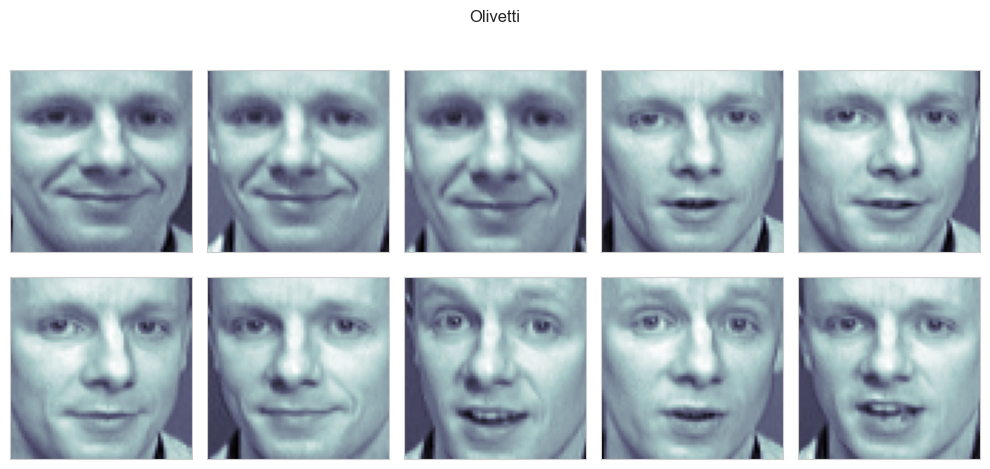

In [ ]:
N = 2
M = 5

fig = plt.figure(figsize=(10, 5))
# plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([]) # x 축 제거
    ax.yaxis.set_ticks([]) # y 축 제거

plt.suptitle('Olivetti')
plt.tight_layout()
plt.show()

## <a id='toc5_1_'></a>[주성분 2개 PCA](#toc0_)

In [73]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=2)

X = faces_all.data[faces_all.target == K]
W = pca.fit_transform(X)

X_inv = pca.inverse_transform(W)

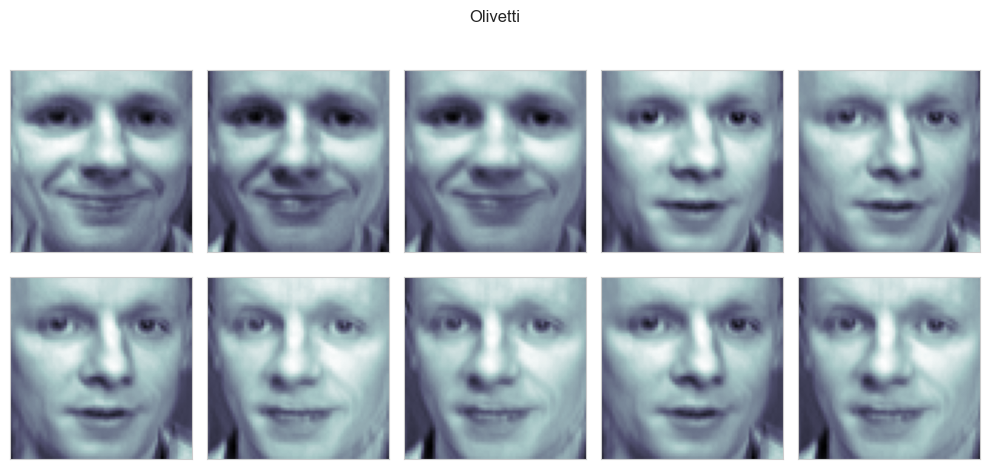

In [ ]:
N = 2
M = 5

fig = plt.figure(figsize=(10, 5))
# plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(X_inv[n].reshape(64, 64), cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([]) # x 축 제거
    ax.yaxis.set_ticks([]) # y 축 제거

plt.suptitle('Olivetti')
plt.tight_layout()
plt.show()

### <a id='toc5_1_1_'></a>[시각화(원점 mean, 주성분 두개)](#toc0_)

In [93]:
pca.mean_.shape, pca.components_[0].shape, pca.components_[1].shape

((4096,), (4096,), (4096,))

In [95]:
face_mean = pca.mean_.reshape(64, 64)

face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)

In [97]:
face_mean.shape, face_p1.shape, face_p2.shape

((64, 64), (64, 64), (64, 64))

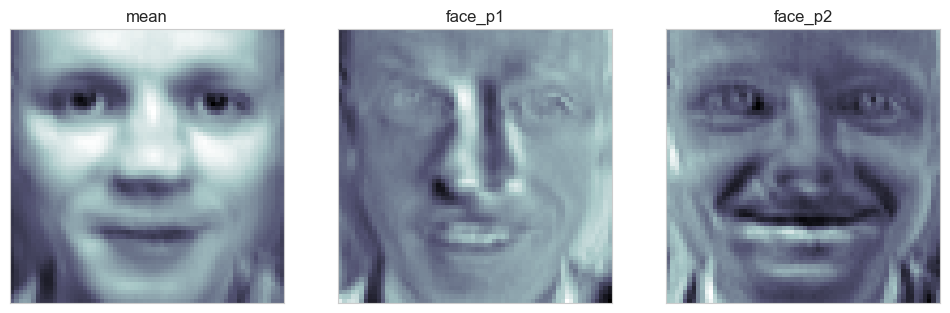

In [101]:
plt.figure(figsize=(12, 7))

plt.subplot(131)
plt.imshow(face_mean, plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('mean')

plt.subplot(132)
plt.imshow(face_p1, plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('face_p1')

plt.subplot(133)
plt.imshow(face_p2, plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('face_p2')

plt.show()

- K=20인 사람의 10장 사진은 두 장으로 표현될 수 있음

### <a id='toc5_1_2_'></a>[가중치에 따른 주성분 벡터 변화](#toc0_)

In [103]:
N = 2
M = 5
w = np.linspace(-5, 10, N*M)
w

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

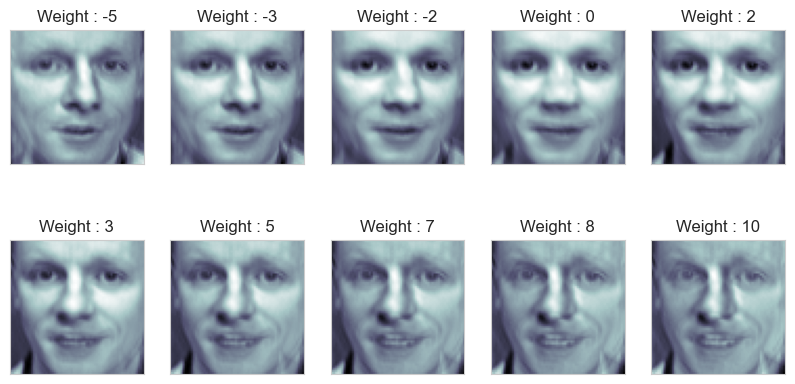

In [104]:
fig = plt.figure(figsize=(10, 5))

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p1, cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Weight : {str(round(w[n]))}')
    
plt.show()

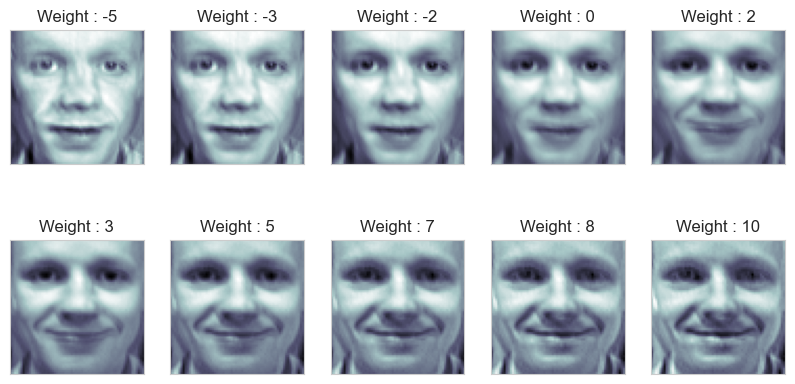

In [105]:
fig = plt.figure(figsize=(10, 5))

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p2, cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Weight : {str(round(w[n]))}')
    
plt.show()

In [106]:
nx, ny = (5, 5)

x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8, ny)
w1, w2 = np.meshgrid(x, y)
w1, w2

(array([[-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ]]),
 array([[-5.  , -5.  , -5.  , -5.  , -5.  ],
        [-1.75, -1.75, -1.75, -1.75, -1.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 4.75,  4.75,  4.75,  4.75,  4.75],
        [ 8.  ,  8.  ,  8.  ,  8.  ,  8.  ]]))

In [107]:
w1 = w1.reshape(-1, )
w2 = w2.reshape(-1, )
w1.shape

(25,)

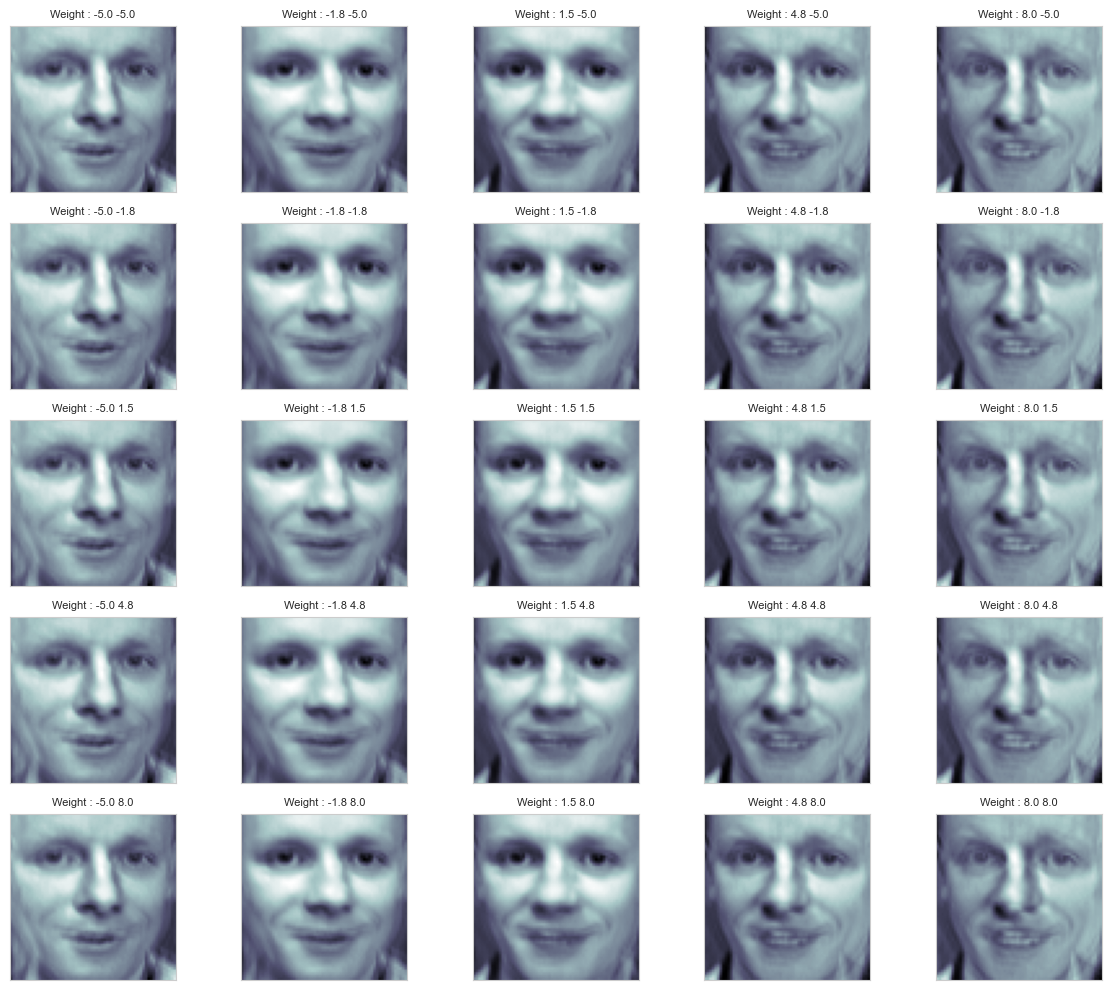

In [114]:
fig = plt.figure(figsize=(12, 10))
# plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

N=5
M=5

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w1[n] * face_p1 + w2[n] + face_p2, cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Weight : {str(round(w1[n],1))} {str(round(w2[n],1))}', fontsize=8)

plt.tight_layout()
plt.show()